## Imports

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\dpaul\OneDrive\Documentos\fraude_study.csv', error_bad_lines=False)

df = df.drop('Unnamed: 0', axis = 1)

print(df.shape)
df.head()

(50000, 21)


,ID_CLIENTE,COD_PARCEIRO_NEGOCIO,COD_NOTA_SERVICO,COD_EMPRESA,DT_MES_EXECUCAO,DESC_MUNICIPIO,DESC_BAIRRO,DESC_CLASSE_CALCULO,DT_REFERENCIA,NUM_DIAS,...,RESULTADO,SEXO,FaixaIDade,OBITO,ESCOLARIDADE,RENDAESTIMADA,FAIXARENDA,SCORE1,SCORE2,RESULTADO_N
0,73fe6addf5437873212b29a12c981c15b0db8c06574e61...,700614111,716573134,D002,201412,VOTORANTIM,JD NOVO MUNDO,Residencial,201311,29,...,IRREGULAR,F,I - Acima de 75 anos,NAO,NaN,380.0,E - DE 0 A 2 SM,10.0,NaN,1
1,d73cf2fb49fb6538d5c3ade7998b4bacc838b8160e0924...,710914826,715897522,D001,201410,BIRIGUI,CJH JOAO CREVELARO,Residencial,201402,30,...,REGULAR,F,I - Acima de 75 anos,NAO,NaN,545.0,E - DE 0 A 2 SM,9.0,10.0,0
2,72afa50efa52af6587f7bbdb486e52b8ecbb91c51c88c9...,701963566,716088410,D001,201411,CAMPINAS,VL PROOST DE SOUZA,Residencial,201312,28,...,REGULAR,M,E - De 36 a 45 anos,NAO,"COLEGIAL COMPLETO, OU MEDIO COMPLETO",1024.0,E - DE 0 A 2 SM,10.0,8.0,0
3,a7b351a1166cf63c2023fc81c91e7cb34751f3a188d2cc...,700611368,715792583,D002,201410,SANTOS,CENTRO,Residencial,201404,28,...,IRREGULAR,I,G - De 56 a 65 anos,NAO,NaN,0.0,E - DE 0 A 2 SM,8.0,10.0,1
4,bacf56dc47141da2caa3458912a5439551ad65a3d1be5c...,702253670,715719024,D001,201410,SANTO ANTONIO DO ARACANGUA,VICENTINOPOLIS,Residencial,201405,31,...,REGULAR,M,F - De 46 a 55 anos,NAO,"COLEGIAL COMPLETO, OU MEDIO COMPLETO",9.0,E - DE 0 A 2 SM,9.0,NaN,0


## Análise Descritiva

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_CLIENTE            50000 non-null  object 
 1   COD_PARCEIRO_NEGOCIO  50000 non-null  int64  
 2   COD_NOTA_SERVICO      50000 non-null  int64  
 3   COD_EMPRESA           50000 non-null  object 
 4   DT_MES_EXECUCAO       50000 non-null  int64  
 5   DESC_MUNICIPIO        50000 non-null  object 
 6   DESC_BAIRRO           50000 non-null  object 
 7   DESC_CLASSE_CALCULO   50000 non-null  object 
 8   DT_REFERENCIA         50000 non-null  int64  
 9   NUM_DIAS              50000 non-null  int64  
 10  FATURADO              50000 non-null  int64  
 11  RESULTADO             50000 non-null  object 
 12  SEXO                  20502 non-null  object 
 13  FaixaIDade            20502 non-null  object 
 14  OBITO                 20502 non-null  object 
 15  ESCOLARIDADE       

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # Removendo a notação científica

df.describe()

,COD_PARCEIRO_NEGOCIO,COD_NOTA_SERVICO,DT_MES_EXECUCAO,DT_REFERENCIA,NUM_DIAS,FATURADO,RENDAESTIMADA,SCORE1,SCORE2,RESULTADO_N
count,50000.00000,50000.00000,50000.00000,50000.00000,50000.00000,50000.00000,20500.00000,19906.00000,10867.00000,50000.00000
mean,695657570.86512,715830263.01426,201409.79686,201348.86990,30.43000,251.67110,968.68464,9.19939,9.19812,0.19238
std,76440442.83907,495080.27244,1.67951,48.72763,2.09257,698.27429,3543.66698,1.21936,1.27919,0.39417
min,60000015.00000,712456387.00000,201407.00000,201301.00000,0.00000,0.00000,0.00000,4.00000,4.00000,0.00000
25%,700913386.50000,715498700.00000,201408.00000,201306.00000,29.00000,50.00000,0.00000,9.00000,9.00000,0.00000
50%,702613969.00000,715892282.50000,201410.00000,201311.00000,30.00000,140.00000,590.00000,10.00000,10.00000,0.00000
75%,704449336.75000,716218896.00000,201411.00000,201404.00000,32.00000,250.00000,1186.25000,10.00000,10.00000,0.00000
max,1000033946.00000,716729908.00000,201412.00000,201411.00000,48.00000,33007.00000,347850.97000,10.00000,10.00000,1.00000


ID_CLIENTE                  0
COD_PARCEIRO_NEGOCIO        0
COD_NOTA_SERVICO            0
COD_EMPRESA                 0
DT_MES_EXECUCAO             0
DESC_MUNICIPIO              0
DESC_BAIRRO                 0
DESC_CLASSE_CALCULO         0
DT_REFERENCIA               0
NUM_DIAS                    0
FATURADO                    0
RESULTADO                   0
SEXO                    29498
FaixaIDade              29498
OBITO                   29498
ESCOLARIDADE            41348
RENDAESTIMADA           29500
FAIXARENDA              29498
SCORE1                  30094
SCORE2                  39133
RESULTADO_N                 0
dtype: int64


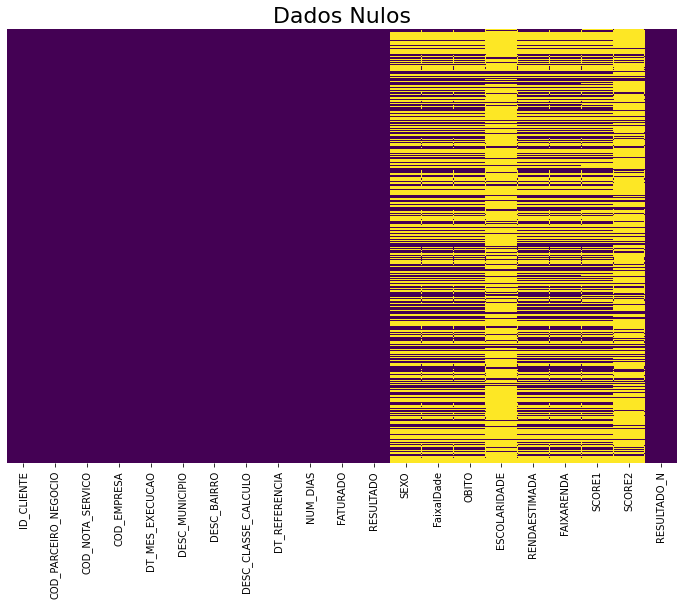

In [8]:
print(pd.isnull(df).sum())

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Dados Nulos',size = 22)
plt.show()

In [9]:
df.dtypes

ID_CLIENTE               object
COD_PARCEIRO_NEGOCIO      int64
COD_NOTA_SERVICO          int64
COD_EMPRESA              object
DT_MES_EXECUCAO           int64
DESC_MUNICIPIO           object
DESC_BAIRRO              object
DESC_CLASSE_CALCULO      object
DT_REFERENCIA             int64
NUM_DIAS                  int64
FATURADO                  int64
RESULTADO                object
SEXO                     object
FaixaIDade               object
OBITO                    object
ESCOLARIDADE             object
RENDAESTIMADA           float64
FAIXARENDA               object
SCORE1                  float64
SCORE2                  float64
RESULTADO_N               int64
dtype: object

In [10]:
df_copy = df.copy()

In [11]:
df_copy['SCORE1'].fillna(0,inplace = True)
df_copy['SCORE2'].fillna(0,inplace = True)

In [12]:
df_copy['SCORE1'].value_counts()

0.00000     30094
10.00000    11569
9.00000      4025
8.00000      2430
7.00000      1213
5.00000       381
4.00000       178
6.00000       110
Name: SCORE1, dtype: int64

In [13]:
df_copy[df_copy['SCORE1'] == 0]['RESULTADO_N'].value_counts(normalize = True)*100

0   80.39144
1   19.60856
Name: RESULTADO_N, dtype: float64

In [14]:
df_copy[df_copy['SCORE2'] == 0]['RESULTADO_N'].value_counts(normalize = True)*100

0   80.35162
1   19.64838
Name: RESULTADO_N, dtype: float64

In [15]:
df['SEXO'].value_counts()

M    11386
F     8787
I      327
J        2
Name: SEXO, dtype: int64

In [16]:
df['SCORE1'].value_counts()

10.00000    11569
9.00000      4025
8.00000      2430
7.00000      1213
5.00000       381
4.00000       178
6.00000       110
Name: SCORE1, dtype: int64

In [17]:
df['SCORE2'].value_counts()

10.00000    6464
9.00000     2113
8.00000     1284
7.00000      531
5.00000      260
4.00000      140
6.00000       75
Name: SCORE2, dtype: int64

In [18]:
df['RENDAESTIMADA'].head()

0    380.00000
1    545.00000
2   1024.00000
3      0.00000
4      9.00000
Name: RENDAESTIMADA, dtype: float64

In [19]:
df['RESULTADO_N'].value_counts()

0    40381
1     9619
Name: RESULTADO_N, dtype: int64

In [20]:
print(df['RENDAESTIMADA'].min())
print(df['RENDAESTIMADA'].max())

0.0
347850.97


## Criando uma faixa salarial para as análises posteriores

In [21]:
def faixa_salarial(dado):
    
    if (dado >= 0.0) & (dado <= 1000.0):
        return 'E' 
    
    elif (dado > 1000.0) & (dado <= 3000.0):
        return 'D'
    
    elif (dado > 3000.0) & (dado <= 6000.0):
        return 'C'
    
    elif (dado > 6000.0) & (dado <= 20000.0):
        return 'B'
    
    elif (dado > 20000.0) & (dado <= 100000.0):
        return 'A'
    
    elif (dado > 100000.0):
        return 'S'
    
    else:
        return 'Sem_salario'

In [22]:
df_copy['RENDAESTIMADA_FAIXA'] = df_copy['RENDAESTIMADA'].apply(faixa_salarial)

In [23]:
df_copy['RENDAESTIMADA_FAIXA'].value_counts(ascending = True)

S                  2
A                 31
B                279
C                804
D               5218
E              14166
Sem_salario    29500
Name: RENDAESTIMADA_FAIXA, dtype: int64

In [24]:
df__ = df_copy.groupby(['COD_EMPRESA','SEXO']).agg({'RENDAESTIMADA':'mean'}, ascendig = False).reset_index()
df__['RENDAESTIMADA'] = df__['RENDAESTIMADA'].apply(round, 2)
df__.head()

,COD_EMPRESA,SEXO,RENDAESTIMADA
0,D001,F,745
1,D001,I,784
2,D001,M,1156
3,D002,F,655
4,D002,I,691


In [25]:
df__['SEXO'].value_counts()

F    7
M    7
I    3
J    1
Name: SEXO, dtype: int64

## Análise Diagnóstica

In [26]:
df_copy['SEXO'].value_counts()

M    11386
F     8787
I      327
J        2
Name: SEXO, dtype: int64

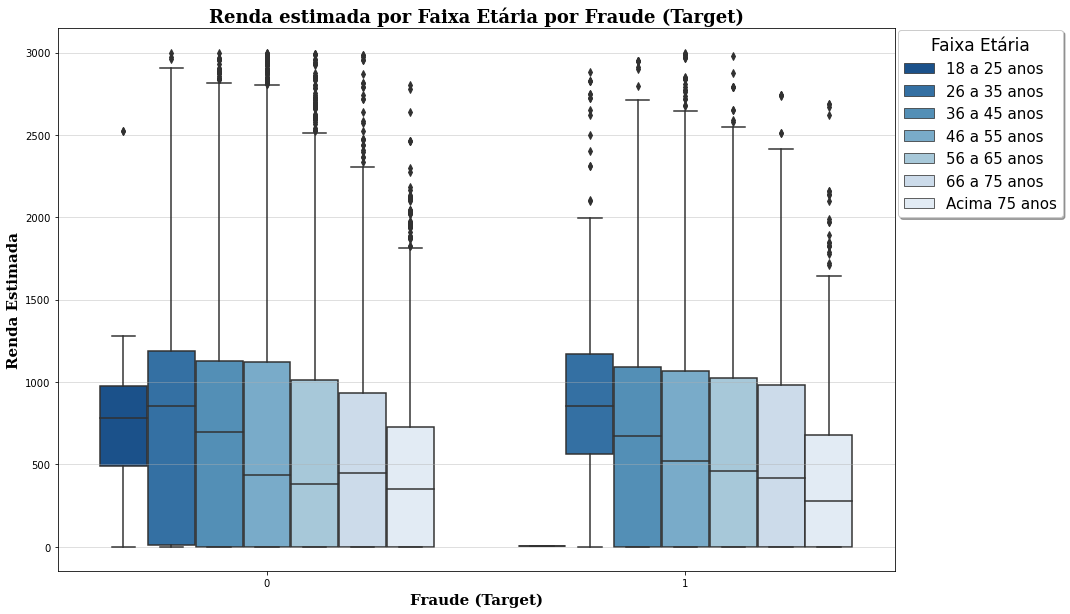

In [27]:
plt.figure(figsize = (15,10))

df_salario = df_copy[(df_copy['RENDAESTIMADA'] <= 3000) & (df_copy['FaixaIDade'] != 'J - Indefinido')]

hue = df_copy['FaixaIDade'].value_counts()[['C - De 18 a 25 anos','D - De 26 a 35 anos','E - De 36 a 45 anos','F - De 46 a 55 anos','G - De 56 a 65 anos','H - De 66 a 75 anos','I - Acima de 75 anos']]

plt.grid(True, alpha = 0.5,zorder = 0)

sns.boxplot(x = 'RESULTADO_N',y = 'RENDAESTIMADA', hue = 'FaixaIDade',hue_order = hue.index,palette = 'Blues_r',data = df_salario, zorder = 3)

plt.title('Renda estimada por Faixa Etária por Fraude (Target)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Fraude (Target)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True, bbox_to_anchor=(1.21, 1.01))
L.set_title('Faixa Etária', prop={'size':17})
L.get_texts()[0].set_text('18 a 25 anos')
L.get_texts()[1].set_text('26 a 35 anos')
L.get_texts()[2].set_text('36 a 45 anos')
L.get_texts()[3].set_text('46 a 55 anos')
L.get_texts()[4].set_text('56 a 65 anos')
L.get_texts()[5].set_text('66 a 75 anos')
L.get_texts()[6].set_text('Acima 75 anos')

Text(0, 0.5, 'Renda Estimada')

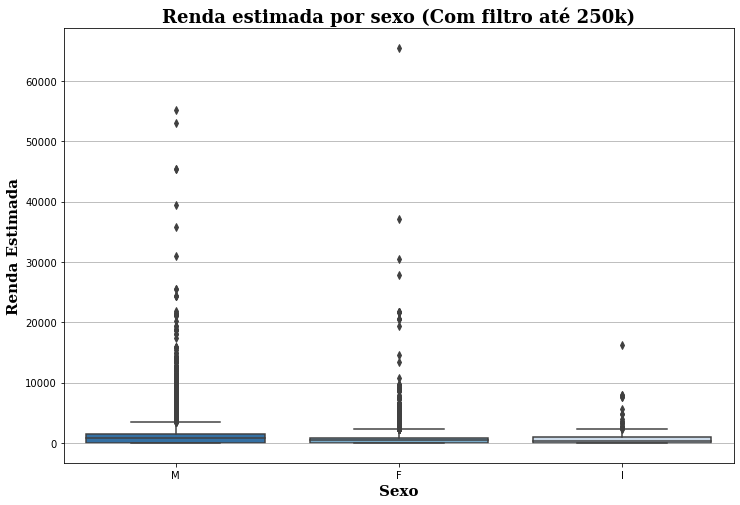

In [28]:
plt.figure(figsize = (12,8))

df_salario = df_copy[df_copy['RENDAESTIMADA'] < 250000]

order = df_copy['SEXO'].value_counts()[['M','F','I']]

plt.grid(True, zorder = 0)
sns.boxplot(x = 'SEXO', y = 'RENDAESTIMADA', order = order.index,data = df_salario, palette = 'Blues_r',zorder = 16)

plt.title('Renda estimada por sexo (Com filtro até 250k)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Sexo', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})

Text(0, 0.5, 'Renda Estimada')

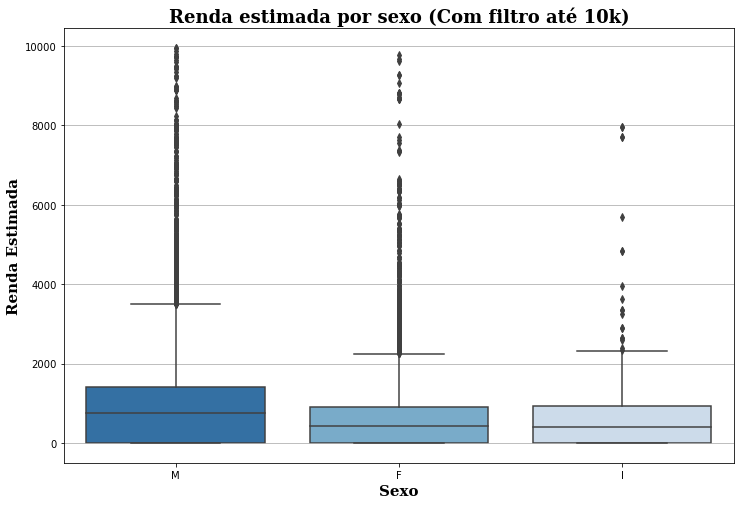

In [29]:
plt.figure(figsize = (12,8))

df_salario = df_copy[df_copy['RENDAESTIMADA'] < 10000]

order = df_copy['SEXO'].value_counts()[['M','F','I']]

plt.grid(True, zorder = 1)
sns.boxplot(x = 'SEXO', y = 'RENDAESTIMADA', order = order.index,data = df_salario, palette = 'Blues_r',zorder = 3)

plt.title('Renda estimada por sexo (Com filtro até 10k)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Sexo', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})

In [30]:
df_copy.columns

Index(['ID_CLIENTE', 'COD_PARCEIRO_NEGOCIO', 'COD_NOTA_SERVICO', 'COD_EMPRESA',
       'DT_MES_EXECUCAO', 'DESC_MUNICIPIO', 'DESC_BAIRRO',
       'DESC_CLASSE_CALCULO', 'DT_REFERENCIA', 'NUM_DIAS', 'FATURADO',
       'RESULTADO', 'SEXO', 'FaixaIDade', 'OBITO', 'ESCOLARIDADE',
       'RENDAESTIMADA', 'FAIXARENDA', 'SCORE1', 'SCORE2', 'RESULTADO_N',
       'RENDAESTIMADA_FAIXA'],
      dtype='object')

In [31]:
df_copy.dtypes

ID_CLIENTE               object
COD_PARCEIRO_NEGOCIO      int64
COD_NOTA_SERVICO          int64
COD_EMPRESA              object
DT_MES_EXECUCAO           int64
DESC_MUNICIPIO           object
DESC_BAIRRO              object
DESC_CLASSE_CALCULO      object
DT_REFERENCIA             int64
NUM_DIAS                  int64
FATURADO                  int64
RESULTADO                object
SEXO                     object
FaixaIDade               object
OBITO                    object
ESCOLARIDADE             object
RENDAESTIMADA           float64
FAIXARENDA               object
SCORE1                  float64
SCORE2                  float64
RESULTADO_N               int64
RENDAESTIMADA_FAIXA      object
dtype: object

In [32]:
df_salario['FaixaIDade'].value_counts()

F - De 46 a 55 anos     6806
G - De 56 a 65 anos     3686
E - De 36 a 45 anos     3531
I - Acima de 75 anos    2259
D - De 26 a 35 anos     2185
H - De 66 a 75 anos     1771
J - Indefinido           109
C - De 18 a 25 anos       40
Name: FaixaIDade, dtype: int64

Text(0, 0.5, 'Renda Estimada')

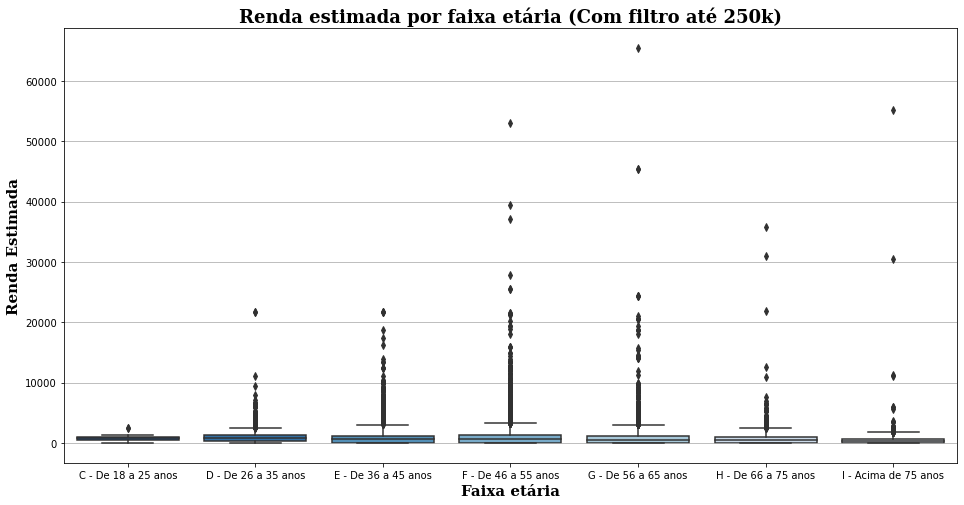

In [33]:
plt.figure(figsize = (16,8))

df_salario = df_copy[(df_copy['RENDAESTIMADA'] < 250000) & (df_copy['FaixaIDade'] != 'J - Indefinido')]

order = df_copy['FaixaIDade'].value_counts()[['C - De 18 a 25 anos','D - De 26 a 35 anos','E - De 36 a 45 anos','F - De 46 a 55 anos','G - De 56 a 65 anos','H - De 66 a 75 anos','I - Acima de 75 anos']]

plt.grid(True, zorder = 1)
sns.boxplot(x = 'FaixaIDade', y = 'RENDAESTIMADA',order = order.index,palette = 'Blues_r',data = df_salario,zorder = 3)

plt.title('Renda estimada por faixa etária (Com filtro até 250k)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Faixa etária', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})

In [34]:
df_copy.columns

Index(['ID_CLIENTE', 'COD_PARCEIRO_NEGOCIO', 'COD_NOTA_SERVICO', 'COD_EMPRESA',
       'DT_MES_EXECUCAO', 'DESC_MUNICIPIO', 'DESC_BAIRRO',
       'DESC_CLASSE_CALCULO', 'DT_REFERENCIA', 'NUM_DIAS', 'FATURADO',
       'RESULTADO', 'SEXO', 'FaixaIDade', 'OBITO', 'ESCOLARIDADE',
       'RENDAESTIMADA', 'FAIXARENDA', 'SCORE1', 'SCORE2', 'RESULTADO_N',
       'RENDAESTIMADA_FAIXA'],
      dtype='object')

Text(0, 0.5, 'Renda Estimada')

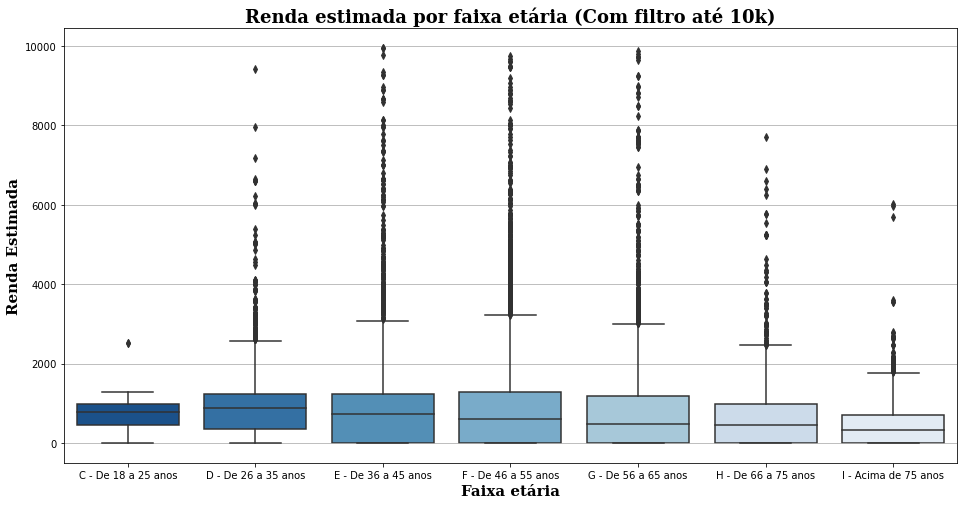

In [35]:
plt.figure(figsize = (16,8))

df_salario = df_copy[(df_copy['RENDAESTIMADA'] < 10000) & (df_copy['FaixaIDade'] != 'J - Indefinido')]

order = df_copy['FaixaIDade'].value_counts()[['C - De 18 a 25 anos','D - De 26 a 35 anos','E - De 36 a 45 anos','F - De 46 a 55 anos','G - De 56 a 65 anos','H - De 66 a 75 anos','I - Acima de 75 anos']]

plt.grid(True, zorder = 1)
sns.boxplot(x = 'FaixaIDade', y = 'RENDAESTIMADA',order = order.index,palette = 'Blues_r',data = df_salario,zorder = 3)

plt.title('Renda estimada por faixa etária (Com filtro até 10k)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Faixa etária', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})

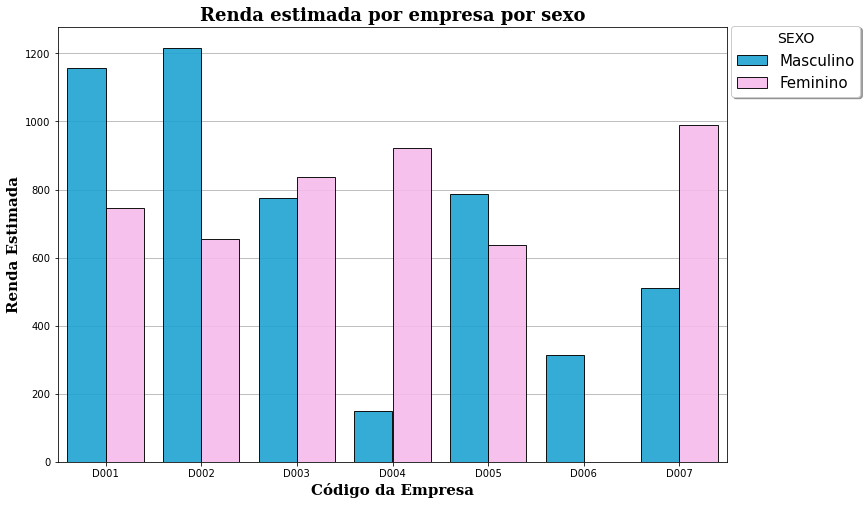

In [36]:
plt.figure(figsize = (12,8))

order = df__['COD_EMPRESA'].value_counts()[['D001','D002','D003','D004','D005','D006','D007']]

hue_order = df__['SEXO'].value_counts()[['M', 'F']]

plt.grid(True, zorder = 0)
sns.barplot(x = 'COD_EMPRESA', y = 'RENDAESTIMADA', order = order.index,hue = 'SEXO', hue_order = hue_order.index, data = df__, palette = {'M':'#00b1f0', 'F':'#ffb1f0','I':'green','J':'brown'},edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)

plt.title('Renda estimada por empresa por sexo', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Código da Empresa', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Renda Estimada', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True, bbox_to_anchor=(1.21, 1.02))
L.set_title('SEXO', prop={'size':14})
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

In [37]:
df_copy.columns

Index(['ID_CLIENTE', 'COD_PARCEIRO_NEGOCIO', 'COD_NOTA_SERVICO', 'COD_EMPRESA',
       'DT_MES_EXECUCAO', 'DESC_MUNICIPIO', 'DESC_BAIRRO',
       'DESC_CLASSE_CALCULO', 'DT_REFERENCIA', 'NUM_DIAS', 'FATURADO',
       'RESULTADO', 'SEXO', 'FaixaIDade', 'OBITO', 'ESCOLARIDADE',
       'RENDAESTIMADA', 'FAIXARENDA', 'SCORE1', 'SCORE2', 'RESULTADO_N',
       'RENDAESTIMADA_FAIXA'],
      dtype='object')

Faixas salariais: 

E - DE 0 A 2 SM       16661
D - DE 2 A 4 SM        2636
C - DE 4 A 10 SM        990
B - DE 10 A 20 SM       162
A - ACIMA DE 20 SM       53
Name: FAIXARENDA, dtype: int64


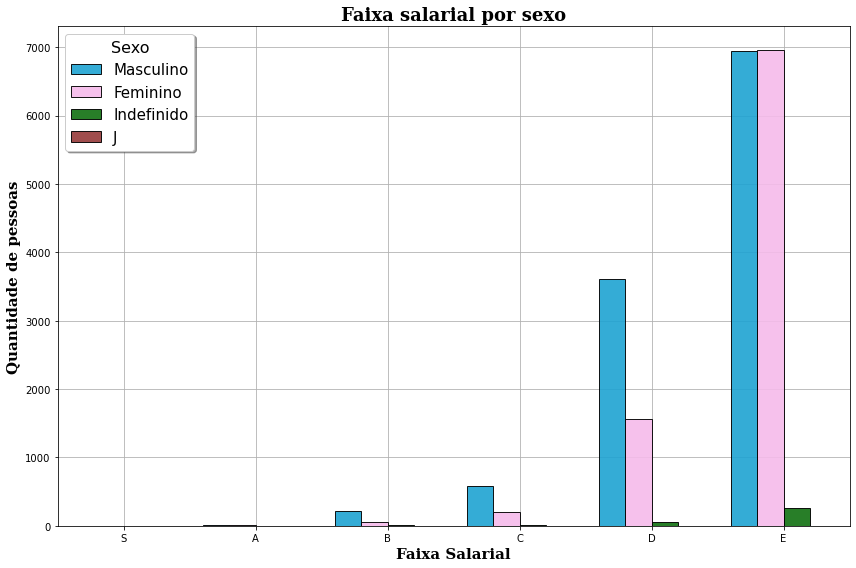

In [38]:
print('Faixas salariais: \n')
print(df_copy['FAIXARENDA'].value_counts())

plt.figure(figsize = (12,8))

order = df_copy['RENDAESTIMADA_FAIXA'].value_counts()[['S', 'A', 'B', 'C', 'D', 'E']]

ax = sns.countplot(x = 'RENDAESTIMADA_FAIXA',order = order.index,data = df_copy, hue = 'SEXO', hue_order = df_copy['SEXO'].value_counts().index,palette = {'M':'#00b1f0', 'F':'#ffb1f0','I':'green','J':'brown'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.title('Faixa salarial por sexo', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Faixa Salarial', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Quantidade de pessoas', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper left",fontsize=15, fancybox=True, shadow = True)
L.set_title('Sexo',prop={'size':16})
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')
L.get_texts()[2].set_text('Indefinido')
plt.tight_layout()

In [39]:
df_copy['RENDAESTIMADA_FAIXA'].value_counts()

Sem_salario    29500
E              14166
D               5218
C                804
B                279
A                 31
S                  2
Name: RENDAESTIMADA_FAIXA, dtype: int64

In [40]:
df_grouped['SEXO'].value_counts()

M    1512
F    1249
I      34
J       1
Name: SEXO, dtype: int64

In [78]:
df_grouped = df.groupby(['ID_CLIENTE','SEXO']).agg({'RESULTADO_N':'sum'}).rename(columns = {'RESULTADO_N':'Qtd_de_fraudes'})
df_grouped = df_grouped[df_grouped['Qtd_de_fraudes'] > 0]
df_grouped = df_grouped.reset_index()
df_grouped.head(2)

,ID_CLIENTE,SEXO,Qtd_de_fraudes
0,003b515bf26874a2740b82e6d42d3266a0870964bfbd46...,M,1
1,00503a55c7071fd4ebfa77ead860fe8d7033136b88c378...,M,1


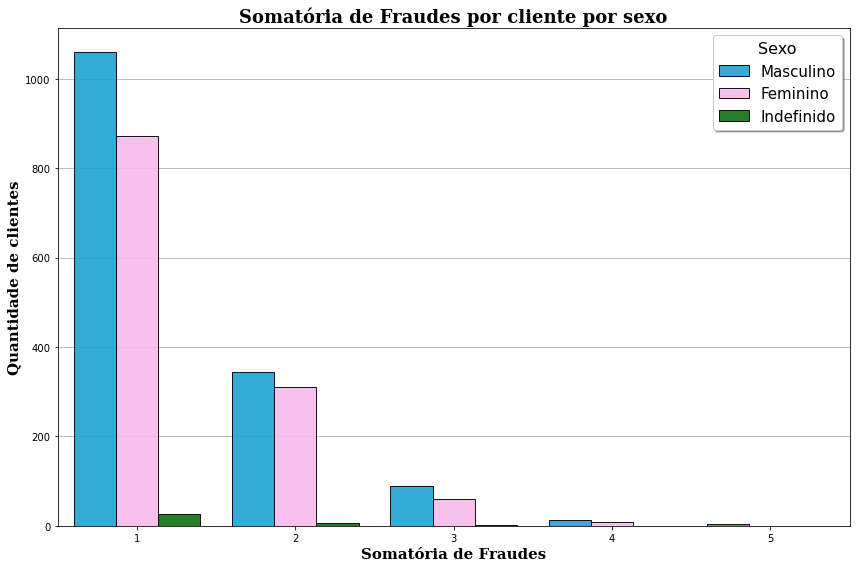

In [41]:
plt.figure(figsize=(12,8))

hue_order = df_grouped['SEXO'].value_counts()[['M','F','I']]

plt.grid(True,zorder = 0)
sns.countplot(x = 'Qtd_de_fraudes', hue = 'SEXO',data = df_grouped, hue_order = hue_order.index,palette = {'M':'#00b1f0', 'F':'#ffb1f0','I':'green','J':'brown'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)

plt.title('Somatória de Fraudes por cliente por sexo', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Somatória de Fraudes', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Quantidade de clientes', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})

L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True)
L.set_title('Sexo',prop={'size':16})
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')
L.get_texts()[2].set_text('Indefinido')
plt.tight_layout()

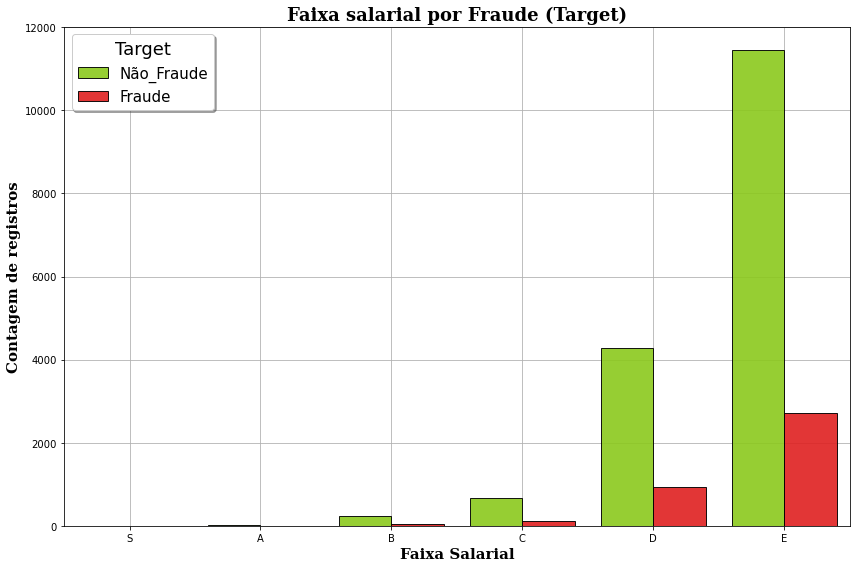

In [42]:
plt.figure(figsize = (12,8))

order = df_copy['RENDAESTIMADA_FAIXA'].value_counts()[['S', 'A', 'B', 'C', 'D', 'E']]

ax = sns.countplot(x = 'RENDAESTIMADA_FAIXA',order = order.index,data = df_copy, hue = 'RESULTADO_N', hue_order = df_copy['RESULTADO_N'].value_counts().index,palette = {0:'#93e600', 1:'red'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.title('Faixa salarial por Fraude (Target)', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Faixa Salarial', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper left",fontsize=15, fancybox=True, shadow = True)
L.set_title('Target',prop={'size':18})
L.get_texts()[0].set_text('Não_Fraude')
L.get_texts()[1].set_text('Fraude')
plt.tight_layout()

In [43]:
df_municipio_fraude = df_copy[df_copy['RESULTADO_N'] == 1]

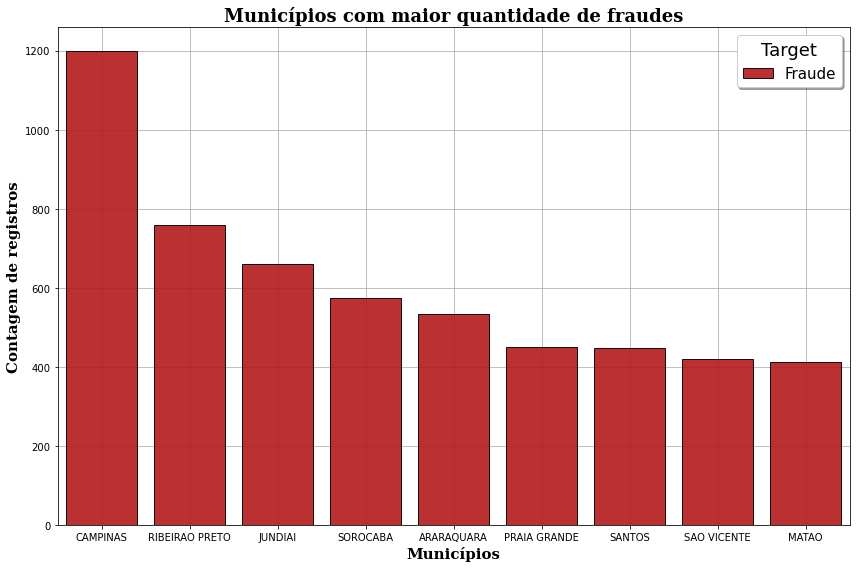

In [44]:
plt.figure(figsize = (12,8))

order = df_municipio_fraude['DESC_MUNICIPIO'].value_counts().index[0:9]

hue_order = df_copy[df_copy['RESULTADO_N'] == 1]['RESULTADO_N']

ax = sns.countplot(x = 'DESC_MUNICIPIO',order = order,data = df_municipio_fraude, hue = hue_order,palette = {1:'#ce0000'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.title('Municípios com maior quantidade de fraudes', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Municípios', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True)
L.set_title('Target',prop={'size':18})
L.get_texts()[0].set_text('Fraude')
plt.tight_layout()

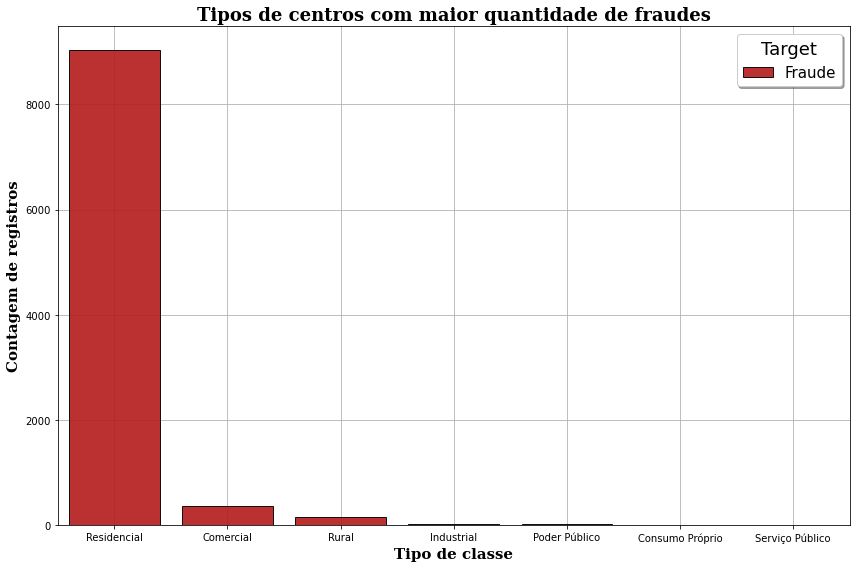

In [45]:
plt.figure(figsize = (12,8))

order = df_municipio_fraude['DESC_CLASSE_CALCULO'].value_counts().index

hue_order = df_copy[df_copy['RESULTADO_N'] == 1]['RESULTADO_N']

ax = sns.countplot(x = 'DESC_CLASSE_CALCULO',order = order,data = df_municipio_fraude, hue = hue_order,palette = {1:'#ce0000'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.title('Tipos de centros com maior quantidade de fraudes', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Tipo de classe', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True)
L.set_title('Target',prop={'size':18})
L.get_texts()[0].set_text('Fraude')
plt.tight_layout()

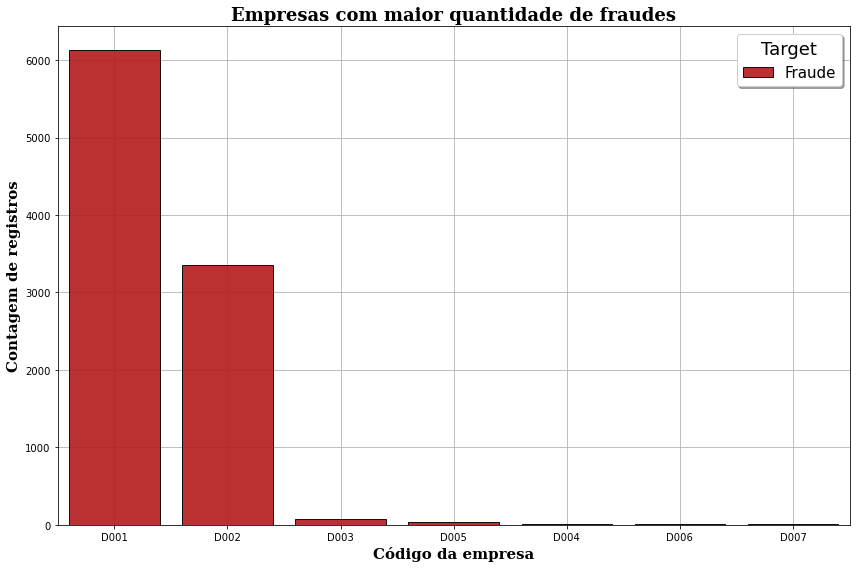

In [46]:
plt.figure(figsize = (12,8))

order = df_municipio_fraude['COD_EMPRESA'].value_counts().index

#hue_order = df_copy[df_copy['RESULTADO_N'] == 1]['RESULTADO_N']

ax = sns.countplot(x = 'COD_EMPRESA',order = order,data = df_municipio_fraude, hue = hue_order,palette = {1:'#ce0000'}, edgecolor="black", linewidth=1, alpha = 0.9, zorder = 3)
plt.grid(True, zorder = 0)
plt.title('Empresas com maior quantidade de fraudes', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
plt.xlabel('Código da empresa', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
plt.ylabel('Contagem de registros', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 15})
L = plt.legend(loc="upper right",fontsize=15, fancybox=True, shadow = True)
L.set_title('Target',prop={'size':18})
L.get_texts()[0].set_text('Fraude')
plt.tight_layout()

## Preparando os dados para a Modelagem Preditiva

In [47]:
print(df_copy.shape)
print(pd.isnull(df_copy).sum())

(50000, 22)
ID_CLIENTE                  0
COD_PARCEIRO_NEGOCIO        0
COD_NOTA_SERVICO            0
COD_EMPRESA                 0
DT_MES_EXECUCAO             0
DESC_MUNICIPIO              0
DESC_BAIRRO                 0
DESC_CLASSE_CALCULO         0
DT_REFERENCIA               0
NUM_DIAS                    0
FATURADO                    0
RESULTADO                   0
SEXO                    29498
FaixaIDade              29498
OBITO                   29498
ESCOLARIDADE            41348
RENDAESTIMADA           29500
FAIXARENDA              29498
SCORE1                      0
SCORE2                      0
RESULTADO_N                 0
RENDAESTIMADA_FAIXA         0
dtype: int64


In [48]:
df_copy = df_copy.drop(['SEXO', 
                        'FaixaIDade', 
                        'OBITO', 
                        'ESCOLARIDADE', 
                        'RENDAESTIMADA', 
                        'FAIXARENDA',
                        'ID_CLIENTE',
                        'COD_PARCEIRO_NEGOCIO', 
                        'COD_EMPRESA', 
                        'COD_NOTA_SERVICO', 
                        'RENDAESTIMADA_FAIXA'], axis = 1)

In [49]:
print(df_copy.shape)
print(pd.isnull(df_copy).sum())

(50000, 11)
DT_MES_EXECUCAO        0
DESC_MUNICIPIO         0
DESC_BAIRRO            0
DESC_CLASSE_CALCULO    0
DT_REFERENCIA          0
NUM_DIAS               0
FATURADO               0
RESULTADO              0
SCORE1                 0
SCORE2                 0
RESULTADO_N            0
dtype: int64


In [50]:
df_copy.dtypes 

DT_MES_EXECUCAO          int64
DESC_MUNICIPIO          object
DESC_BAIRRO             object
DESC_CLASSE_CALCULO     object
DT_REFERENCIA            int64
NUM_DIAS                 int64
FATURADO                 int64
RESULTADO               object
SCORE1                 float64
SCORE2                 float64
RESULTADO_N              int64
dtype: object

## Normalização/Preparação dos dados

In [51]:
from sklearn.model_selection import train_test_split

# selecionando apenas variáveis independentes
X = df_copy.drop('RESULTADO_N', axis=1)
# selecionando apenas a variável dependente(target)
y = df_copy['RESULTADO_N']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)# serve para tornar o processo em algo reprodutivo

# vendo o shape de cada um dos x(linhas e colunas)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 10), (15000, 10), (35000,), (15000,))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df_copy.drop('RESULTADO_N',axis = 1).select_dtypes(exclude = 'object').columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<ipython-input-52-145cb68be800>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-52-145cb68be800>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

## Modelagem Preditiva com CatBoost

In [53]:
!pip install catboost 

In [54]:
from catboost import CatBoostClassifier

In [55]:
df_copy['RESULTADO_N'] = df_copy['RESULTADO_N'].astype('object')

In [56]:
cat_cols = df_copy.drop("RESULTADO_N", axis=1).select_dtypes(include = 'object').columns
cat_cols

Index(['DESC_MUNICIPIO', 'DESC_BAIRRO', 'DESC_CLASSE_CALCULO', 'RESULTADO'], dtype='object')

In [57]:
X_train.dtypes

DT_MES_EXECUCAO        float64
DESC_MUNICIPIO          object
DESC_BAIRRO             object
DESC_CLASSE_CALCULO     object
DT_REFERENCIA          float64
NUM_DIAS               float64
FATURADO               float64
RESULTADO               object
SCORE1                 float64
SCORE2                 float64
dtype: object

In [58]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

#train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)

In [59]:
df_copy.columns

Index(['DT_MES_EXECUCAO', 'DESC_MUNICIPIO', 'DESC_BAIRRO',
       'DESC_CLASSE_CALCULO', 'DT_REFERENCIA', 'NUM_DIAS', 'FATURADO',
       'RESULTADO', 'SCORE1', 'SCORE2', 'RESULTADO_N'],
      dtype='object')

In [60]:
model_CB = CatBoostClassifier(loss_function='MultiClass', iterations=100, od_pval=2, l2_leaf_reg=3,random_state = 36)

In [61]:
model_CB.fit(X_train, y_train, cat_features = categorical_features_indices, eval_set=(X_test, y_test))

0:	learn: 0.6636555	test: 0.6636553	best: 0.6636553 (0)	total: 248ms	remaining: 24.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6636553461
bestIteration = 0

Shrink model to first 1 iterations.


In [62]:
y_pred_CB = model_CB.predict(X_test)

In [63]:
# Resultados puros (sem técnicas para suavisar o Overfiting)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_CB, target_names = ['Não-Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não-Fraude       1.00      1.00      1.00     12096
      Fraude       1.00      1.00      1.00      2904

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



## Utilizando a técnica de UnderSampling 

In [64]:
df_copy['RESULTADO_N'] = df_copy['RESULTADO_N'].astype('int64')

In [65]:
from imblearn.under_sampling import RandomUnderSampler 

under = RandomUnderSampler()
x = df_copy.drop('RESULTADO_N',axis=1)
y = df_copy['RESULTADO_N']
x,y = under.fit_resample(x,y)
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3) # split

In [66]:
model_CB_under = CatBoostClassifier(depth = 5,learning_rate = 0.5,iterations= 50,loss_function = 'MultiClass', l2_leaf_reg= 1,random_state = 36)

In [67]:
model_CB_under.fit(x_train, y_train, cat_features = categorical_features_indices, eval_set=(x_test, y_test))

0:	learn: 0.3135808	test: 0.3135826	best: 0.3135826 (0)	total: 13ms	remaining: 638ms
1:	learn: 0.1705150	test: 0.1704983	best: 0.1704983 (1)	total: 25.3ms	remaining: 607ms
2:	learn: 0.0978723	test: 0.0978639	best: 0.0978639 (2)	total: 36.6ms	remaining: 574ms
3:	learn: 0.0577732	test: 0.0577894	best: 0.0577894 (3)	total: 53.5ms	remaining: 615ms
4:	learn: 0.0346197	test: 0.0346259	best: 0.0346259 (4)	total: 70ms	remaining: 630ms
5:	learn: 0.0209300	test: 0.0209017	best: 0.0209017 (5)	total: 85.6ms	remaining: 628ms
6:	learn: 0.0126982	test: 0.0126765	best: 0.0126765 (6)	total: 99ms	remaining: 608ms
7:	learn: 0.0076949	test: 0.0076817	best: 0.0076817 (7)	total: 105ms	remaining: 554ms
8:	learn: 0.0048051	test: 0.0047913	best: 0.0047913 (8)	total: 119ms	remaining: 544ms
9:	learn: 0.0030185	test: 0.0029928	best: 0.0029928 (9)	total: 133ms	remaining: 531ms
10:	learn: 0.0019867	test: 0.0019645	best: 0.0019645 (10)	total: 147ms	remaining: 520ms
11:	learn: 0.0013230	test: 0.0013024	best: 0.001302

In [68]:
y_pred_CB_under = model_CB_under.predict(x_test)

In [69]:
print(classification_report(y_test,y_pred_CB_under, target_names = ['Não-Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não-Fraude       1.00      1.00      1.00      2853
      Fraude       1.00      1.00      1.00      2919

    accuracy                           1.00      5772
   macro avg       1.00      1.00      1.00      5772
weighted avg       1.00      1.00      1.00      5772



## Utilizando a técnica de OverSampling (Melhor Resultado Encontrado)

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
df_copy['RESULTADO_N'] = df_copy['RESULTADO_N'].astype('int64')

In [72]:
sm = SMOTE()
x = df_copy.drop('RESULTADO_N',axis=1)
x.drop(["DESC_MUNICIPIO", "DESC_BAIRRO", "DESC_CLASSE_CALCULO", "RESULTADO"], axis=1, inplace=True)
y = df_copy['RESULTADO_N']
x,y = sm.fit_resample(x,y)
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3) # split

In [73]:
np.bincount(y)

array([40381, 40381], dtype=int64)

In [74]:
model_CB_under = CatBoostClassifier(loss_function='MultiClass', iterations=3000, learning_rate=0.01, od_pval=1, l2_leaf_reg=2.0,random_state = 36)

In [75]:
model_CB_under.fit(x_train, y_train, eval_set=(x_test, y_test))

0:	learn: 0.6918462	test: 0.6918768	best: 0.6918768 (0)	total: 11.5ms	remaining: 34.4s
1:	learn: 0.6905987	test: 0.6906700	best: 0.6906700 (1)	total: 21.7ms	remaining: 32.5s
2:	learn: 0.6896303	test: 0.6896932	best: 0.6896932 (2)	total: 32.3ms	remaining: 32.3s
3:	learn: 0.6887745	test: 0.6888370	best: 0.6888370 (3)	total: 43.7ms	remaining: 32.7s
4:	learn: 0.6876346	test: 0.6877230	best: 0.6877230 (4)	total: 55.6ms	remaining: 33.3s
5:	learn: 0.6866539	test: 0.6867370	best: 0.6867370 (5)	total: 67ms	remaining: 33.4s
6:	learn: 0.6855136	test: 0.6856266	best: 0.6856266 (6)	total: 77.8ms	remaining: 33.3s
7:	learn: 0.6846055	test: 0.6847031	best: 0.6847031 (7)	total: 88.7ms	remaining: 33.2s
8:	learn: 0.6837503	test: 0.6838285	best: 0.6838285 (8)	total: 101ms	remaining: 33.6s
9:	learn: 0.6830235	test: 0.6830953	best: 0.6830953 (9)	total: 112ms	remaining: 33.6s
10:	learn: 0.6822892	test: 0.6823536	best: 0.6823536 (10)	total: 123ms	remaining: 33.4s
11:	learn: 0.6812967	test: 0.6813851	best: 0.6

In [76]:
y_pred_CB_under = model_CB_under.predict(x_test)

In [77]:
print(classification_report(y_test,y_pred_CB_under, target_names = ['Não-Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não-Fraude       0.69      0.78      0.73     12147
      Fraude       0.75      0.66      0.70     12082

    accuracy                           0.72     24229
   macro avg       0.72      0.72      0.72     24229
weighted avg       0.72      0.72      0.72     24229

